In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import zipfile
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
image_directory1 = "D:/Bangkit/Capstone/data/Citra BISINDO"
image_directory2 = "D:/Bangkit/Capstone/data/bisindo_dataset_v2"
image_directory3 = "D:/Bangkit/Capstone/data/bisindo_dataset_v3"

In [8]:
BATCH_SIZE = 16
IMAGE_SIZE = (64, 64)

# Load images and labels
def load_images_and_labels(image_directory, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE):
    images = []
    labels = []
    for label in os.listdir(image_directory):
        label_path = os.path.join(image_directory, label)
        if os.path.isdir(label_path):
            image_paths = [os.path.join(label_path, image_name) for image_name in os.listdir(label_path)]
            for batch_start in range(0, len(image_paths), batch_size):
                batch_end = min(batch_start + batch_size, len(image_paths))
                batch_image_paths = image_paths[batch_start:batch_end]
                batch_images = []
                for image_path in batch_image_paths:
                    image = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
                    image = tf.keras.preprocessing.image.img_to_array(image)
                    image = image / 255.0 
                    batch_images.append(image)
                images.extend(batch_images)
                labels.extend([label] * len(batch_images))
    return np.array(images), np.array(labels)

# Load images and labels
X1, y1 = load_images_and_labels(image_directory1)
X2, y2 = load_images_and_labels(image_directory2)
X3, y3 = load_images_and_labels(image_directory3)

# Combine the data
X = np.concatenate((X1, X2, X3), axis=0)
y = np.concatenate((y1, y2, y3), axis=0)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = tf.keras.utils.to_categorical(y_encoded)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [33]:
X_train.sum()

6084785.5

In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the data generator
history = model.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE,
                    epochs=100,
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.0303 - loss: 3.2777 - val_accuracy: 0.0152 - val_loss: 3.2521
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.0640 - loss: 3.2064 - val_accuracy: 0.2409 - val_loss: 2.7779
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2500 - loss: 2.6160 - val_accuracy: 0.4116 - val_loss: 2.1490
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4134 - loss: 1.9582 - val_accuracy: 0.5488 - val_loss: 1.5706
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5386 - loss: 1.5103 - val_accuracy: 0.6890 - val_loss: 1.1408
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6349 - loss: 1.1240 - val_accuracy: 0.7530 - val_loss: 0.8913
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7198 - loss: 0.9195 - val_accuracy: 0.8293 - val_loss: 0.6610
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7486 - loss: 0.7758 - val_accuracy: 0.

In [17]:
# Make predictions
predictions = model.predict(X_test)

# Predicted classes
predicted_classes = np.argmax(predictions, axis=1)
predicted_class = label_encoder.inverse_transform(predicted_classes)

# True classes
true_classes = np.argmax(y_test, axis=1)
true_class = label_encoder.inverse_transform(true_classes)


print("Predicted classes:", predicted_class[:10])
print("True classes     :", true_class[:10])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted classes: ['Y' 'Y' 'W' 'T' 'T' 'J' 'Y' 'Q' 'Z' 'W']
True classes     : ['Y' 'Y' 'H' 'T' 'T' 'J' 'Y' 'Q' 'Z' 'W']


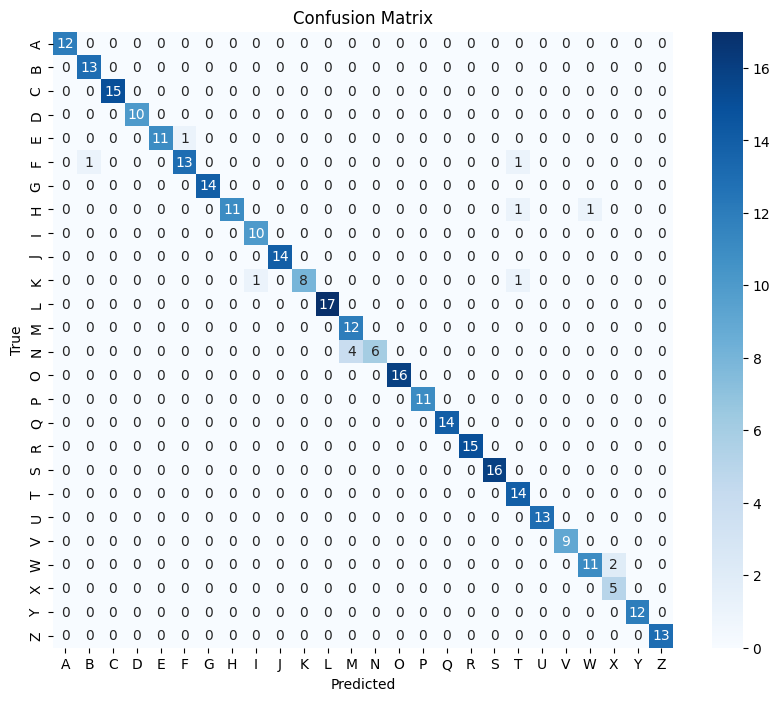

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


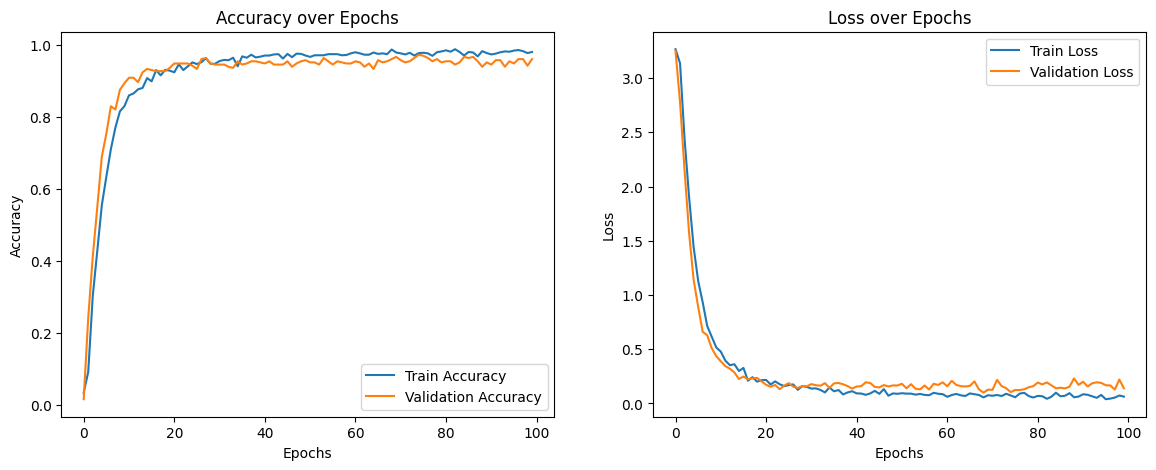

In [19]:
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()


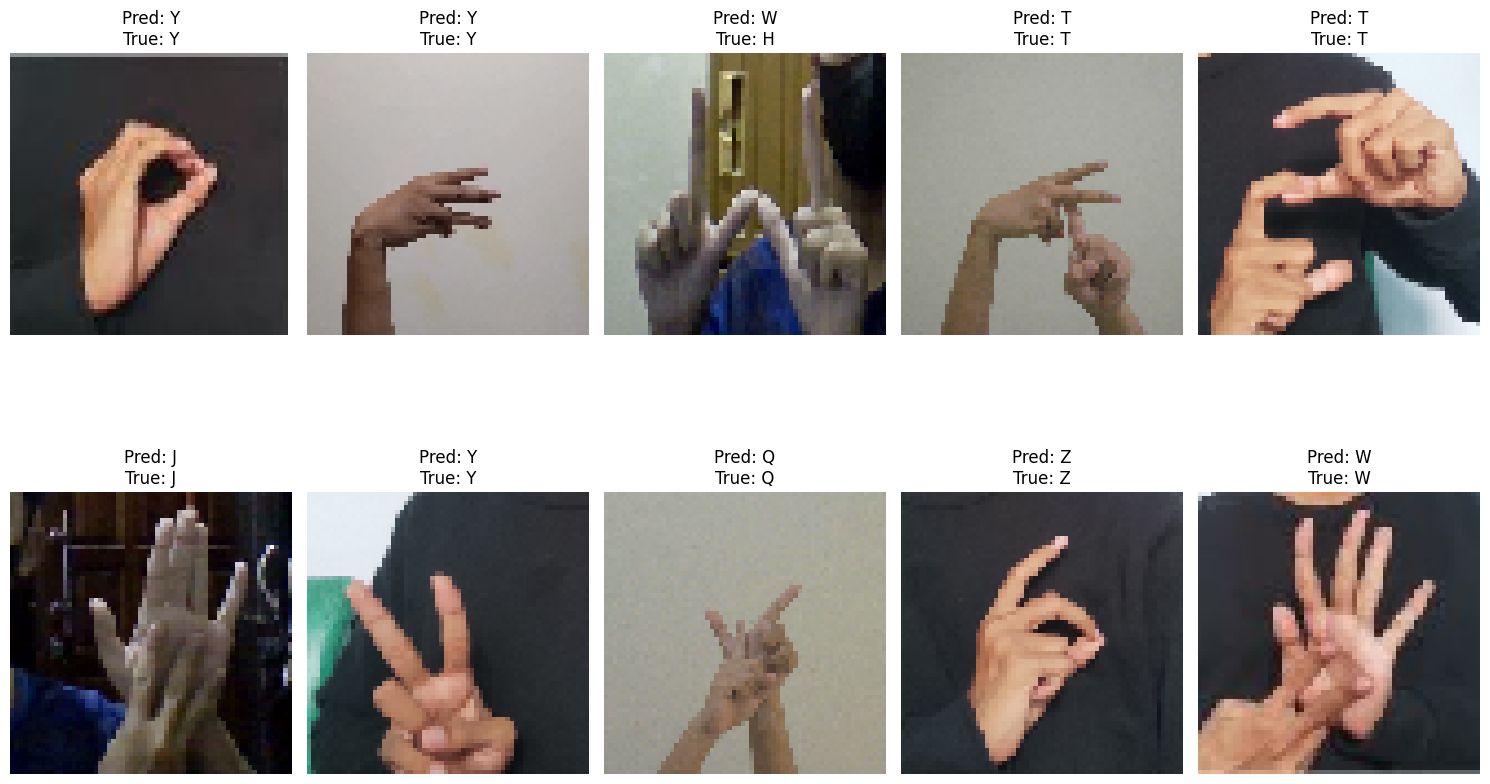

In [36]:
# Visualize a few sample predictions along with their true labels
num_samples = 10
plt.figure(figsize=(15, 10))
for i in range(num_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i+77])
    plt.title(f"Pred: {predicted_class[i]}\nTrue: {true_class[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [17]:
# Save model
model.save('final_model.h5')